# Kernels and their Convolution
### In this notebook we will be Convoluting the mentioned Kernels over a selected image to view the effects

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Image Pre-processing
As we are explaining 3x3 Kernels, an ideal image resolution of 256x256 is taken so that the effects of the kernel are more visible.

The image is also optionally converted to greyscale to make the features more visible.

If the filters are picking up on too much noise, that can be smoothened out as well.

In [155]:
im = Image.open("Eye.jpg")
rim = im.resize((256, 256))
rim.save("Filters/original.jpg")

#Optional to make Black and White
rim = rim.convert('L')

gray_im = np.array(rim)

#Optional to reduce Noise
#gray_im = cv2.bilateralFilter(gray_im, 9, 75, 75) 

Image.fromarray(gray_im).save("Filters/target.jpg")

This is an inbuilt function to filter images via kernels.

In [156]:
def apply_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

### Below are all the Kernels we will be using

In [157]:
kernels = {
    "Identity": np.array([[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]]),
    "Sharpen": np.array([[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]]),
    "Box Blur": np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]]) / 9.0,
    "Gaussian Blur": np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16.0,
    "Edge Detection (Horizontal)": np.array([[-1, -1, -1],
                                              [ 2,  2,  2],
                                              [-1, -1, -1]]),
    "Edge Detection (Vertical)": np.array([[-1,  2, -1],
                                            [-1,  2, -1],
                                            [-1,  2, -1]]),
    "Sobel (Horizontal)": np.array([[-1, 0, 1],
                                      [-2, 0, 2],
                                      [-1, 0, 1]]),
    "Sobel (Vertical)": np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]]),
    "Prewitt (Horizontal)": np.array([[-1, 0, 1],
                                        [-1, 0, 1],
                                        [-1, 0, 1]]),
    "Prewitt (Vertical)": np.array([[-1, -1, -1],
                                      [ 0,  0,  0],
                                      [ 1,  1,  1]]),
    "Scharr (Horizontal)": np.array([[-3, 0, 3],
                                       [-10, 0, 10],
                                       [-3, 0, 3]]),
    "Scharr (Vertical)": np.array([[-3, -10, -3],
                                     [ 0,   0,  0],
                                     [ 3,  10,  3]]),
    "Kirsch (North)": np.array([[ 5,  5,  5],
                                 [-3,  0, -3],
                                 [-3, -3, -3]]),
    "Kirsch (East)": np.array([[-3, -3,  5],
                                 [-3,  0,  5],
                                 [-3, -3,  5]]),
    "Laplacian": np.array([[ 0,  -1,  0],
                             [ -1, 4,  -1],
                             [ 0,  -1,  0]]),
    "Difference of Gaussians": np.array([[ 1,  1,  1],
                                          [ 1, -8,  1],
                                          [ 1,  1,  1]]),
    "Custom": np.array([[ 5,  -3,  5],
                         [ -3, -7,  -3],
                         [ 5,  -3,  5]])
}

kirsch_kernels = [
    np.array([[ 5,  5,  5], [-3,  0, -3], [-3, -3, -3]]),  # North
    np.array([[-3,  5,  5], [-3,  0,  5], [-3, -3, -3]]),  # Northwest
    np.array([[-3, -3,  5], [-3,  0,  5], [-3, -3,  5]]),  # West
    np.array([[-3, -3, -3], [-3,  0,  5], [-3,  5,  5]]),  # Southwest
    np.array([[-3, -3, -3], [-3,  0, -3], [ 5,  5,  5]]),  # South
    np.array([[-3, -3, -3], [ 5,  0, -3], [ 5,  5, -3]]),  # Southeast
    np.array([[ 5, -3, -3], [ 5,  0, -3], [ 5, -3, -3]]),  # East
    np.array([[ 5,  5, -3], [ 5,  0, -3], [-3, -3, -3]])   # Northeast
]

Apply all the filters onto the image

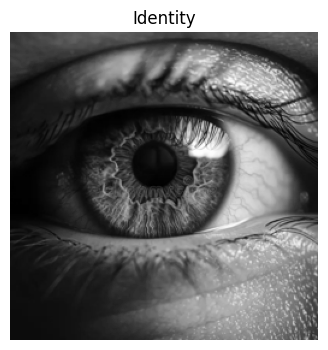

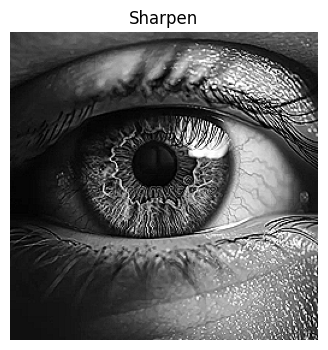

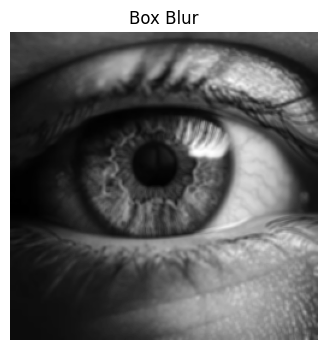

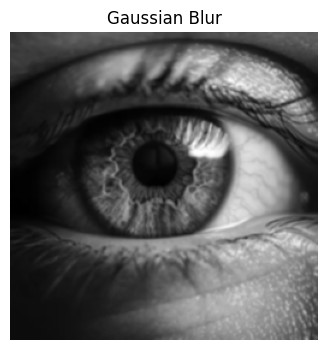

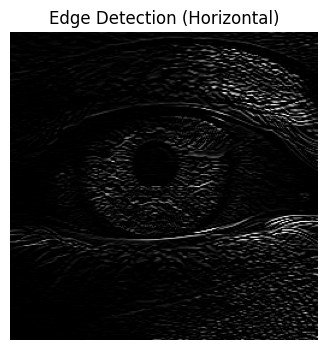

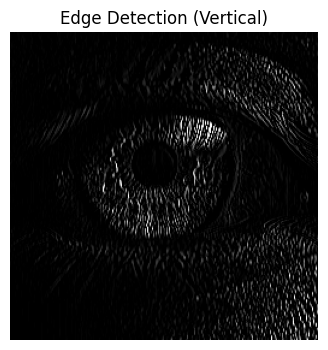

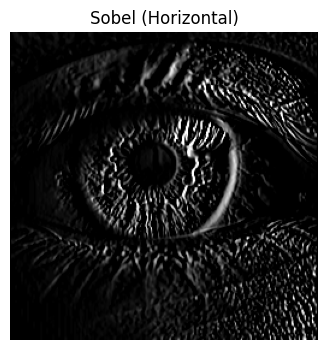

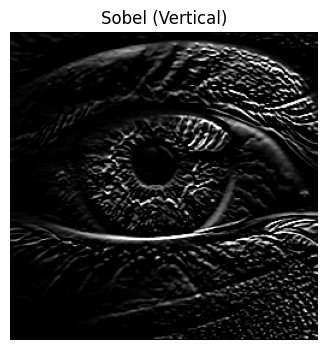

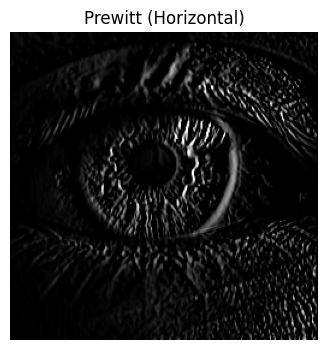

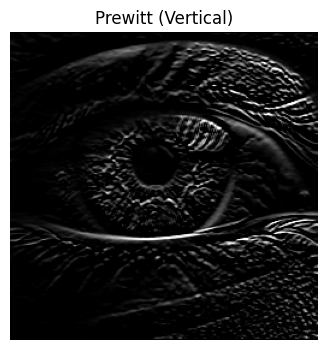

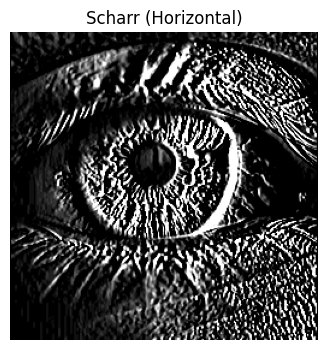

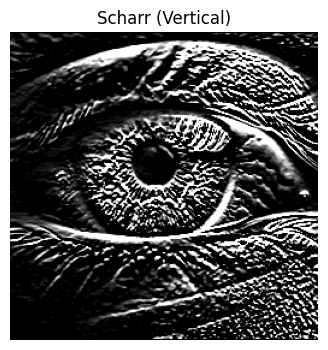

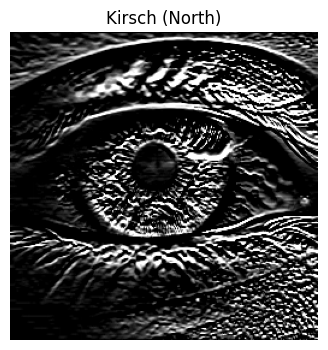

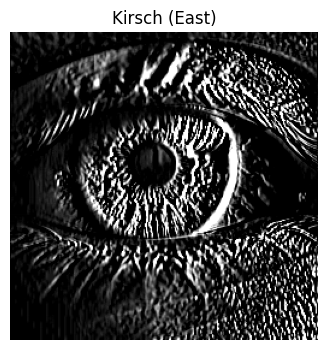

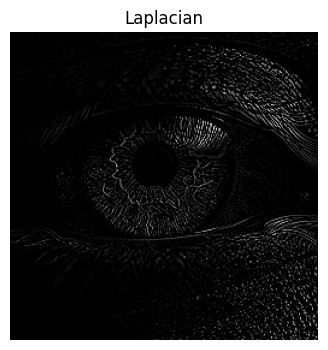

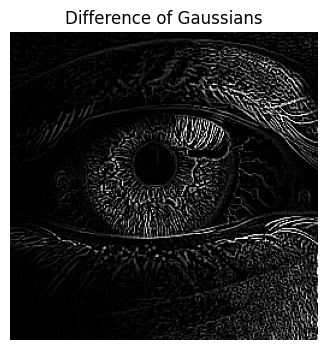

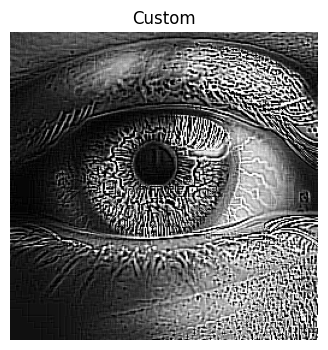

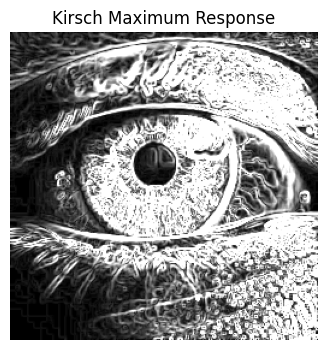

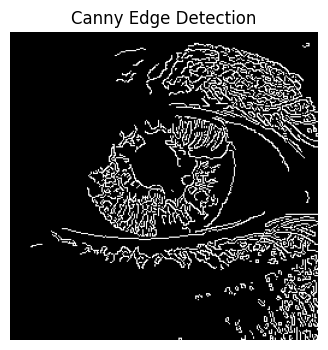

In [158]:
for name, kernel in kernels.items():
    result = apply_kernel(gray_im, kernel)
    result_img = Image.fromarray(result)
    result_img.save(f"Filters/{name.replace(' ', '_')}.jpg")
    
    plt.figure(figsize=(4, 4))
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis("off")
    plt.show()

# Compute the maximum response across all Kirsch directions
kirsch_responses = [apply_kernel(gray_im, k) for k in kirsch_kernels]
max_kirsch = np.maximum.reduce(kirsch_responses)
Image.fromarray(max_kirsch).save("Filters/Kirsch_Maximum.jpg")

plt.figure(figsize=(4, 4))
plt.imshow(max_kirsch, cmap='gray')
plt.title("Kirsch Maximum Response")
plt.axis("off")
plt.show()

#Compute the Canny Edge Detection
canny_edges = cv2.Canny(gray_im, 100, 200)
canny_img = Image.fromarray(canny_edges)
canny_img.save("Filters/Canny_Edge_Detection.jpg")

plt.figure(figsize=(4, 4))
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()
